In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN

In [2]:
#DB, USER ID, FOLLOWERS COUNT, 

In [3]:
data = pd.read_csv('allbrands_users_captions_list.csv')
data = data[data['followers_count']>10000]
data = data[data['followers_count']<100000]

In [15]:
list_users = ['ana_brandine', 'vicky_regouli', 'luismiguelpss', 'ilariabiagini', 
              'emnegg', 'kerendhahn', 'agiorgina', 'roulamatta', 'jussbieber9827', 
              'eremiaheidr', 'eunhuiheo', 'anastasiakaps', 'achaelilsone', 'orit_talbi',
              'sorayaalassmi', 'altonolnlis', 'vaso1977', 'theunrealobserver', 'nsb.koc',
              'vivpeng', 'amrynevillek', 'danalev7', 'irienyree', 'lilachturgeman', 
              'emel_karakoc', 'thiswhomustbekept', 'j_f_lil', 'ulietteearneye', 
              'gilanaz', 'sarrahdolly', 'alexchahine97', 'photographerarson', 
              'angecanindo', 'fiona_smithson', 'chelsea_xu620']
for i,v in enumerate(data.username): 
    for j, k in enumerate(list_users):
        if str(v) == list_users[j]:
            print(v)
            
    #### Note to Karan: 
    ### we need to pick our users. They don't match

## dataframe created at end of doc

In [25]:
dftest = (data.sample(n=50)).reset_index()
dftest

,index,Unnamed: 0,username,followers_count,caption
0,121,121,1ssbtch3,47436,['คืนนี้ คืนนี้ .. พรีม เป็นฝาแฝด ประกบ2พระเอก...
1,120,120,1000sabores,30085,"['Nacieron en el estadio en Caracas, crecieron..."
2,123,123,6shoreroadbypooja,47969,['Effortless with @mia_colona in our plunging ...
3,88,88,_jeanettemadsen_,60279,"['To much to handle 😎', 'Not trying to hide an..."
4,33,33,7daily_official,11512,"['#친정천국\n오늘은 아들이랑 #커플룩', '한국 도착 🛩', '집에가서 일주일동..."
5,100,100,alaalison,11949,"['🌴down the hill 🌴', 'last night, tacos cooked..."
6,45,45,adrianadegreas,94648,"[nan, nan, '@duodesaison @jacquesmariemage @rn..."
7,106,106,abejasboutique,21506,"[""We say having the blues is a good thing... a..."
8,49,49,annieeveringham,28797,['Earthy tones | Last day to catch the @fenton...
9,117,117,alohacollection,21682,"[""Show your man some ALOHA with our new 'SEAL'..."


In [ ]:
# drop the ones that don't use english!


# save to csv 
#.to_csv('usersused.csv', sep=',')

In [26]:
#Saturday

userlist=[]

usernameforeachpost  = []
f2post = []
f3post = []

"""for i,v in enumerate(dftest.username):
    # save the usernames
    userlist.append(v) 
    """
captionsfromsample = dftest.caption
captionsfromsample = (pd.DataFrame(captionsfromsample)).reset_index()
captionsfromsample.drop(['index'], axis =1, inplace = True)

listof = []
for num, singlepost in enumerate(captionsfromsample.caption): 
    ## f1 separates by user. This is each user's total supply of posts
    f1 = singlepost.split("\', \'")

    # take only the first quarter of their text
    quarter= (len(f1)/4)
    f1 = f1[0:int(quarter)]

    f3 = []

    for j,k in enumerate(f1):
        f2 = (f1[j].replace("\n", " ")).replace("\\", "")
        f3.append(f2)
        usernameforeachpost.append(v)
        f2post.append(f2)
        f3post.append(f3)
        
print(len(f2), len(f2post), len(usernameforeachpost))
#df1991 = pd.DataFrame({'caption': f3post, 'username': usernameforeachpost}) 

72 3282 3282


In [27]:
df1991 = pd.DataFrame({'caption': f2post, 'username': usernameforeachpost})  

This is working!

In [28]:
df1991['polarity'] = np.zeros(len(df1991.caption))
vectorizer = CountVectorizer(stop_words=['and', 'or', 'before', 'a', 'an', 'the']) #min_df=4
corpus = df1991['caption'].values
x = vectorizer.fit_transform(corpus)
x = x.toarray()
y = df1991['polarity'].values

## it outputs words
## each line, token column


In [9]:
#vectorizer.vocabulary_
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [29]:
listofwordspercluster = []
#listofwords =[]
clusteritison = []
K=[]
totallist = []
dist = []

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 


for i in range(2,8):
    true_k = i
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(x)
    
    dist.append(sum(np.min(cdist(x, model.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
    

    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()

    for i in range(true_k):
        #print("Cluster :" , i+1)
        listofwords = []
        for ind in order_centroids[i, :-1]:
            listofwords.append(terms[ind])
        #print(listofwords)
        totallist.append(listofwords)
        #print(totallist)
        #listofwordspercluster.append(listofwords)
        clusteritison.append(int(i+1))
        K.append(true_k)
    
DFclusters = pd.DataFrame({'K_askedfor': K, 'clusternumber': clusteritison, 'listofwordspercluster':  totallist})  



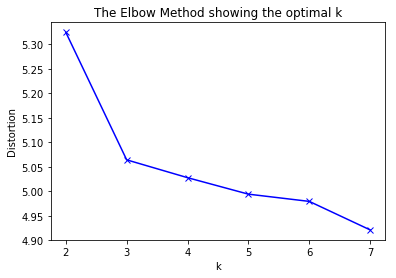

In [30]:
plt.plot(range(2,8), dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
""""listofwordspercluster = []
#listofwords =[]
clusteritison = []
K=[]
totallist = []

for i in range(2,8):
    true_k = i
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(x)

    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()

    for i in range(true_k):
        #print("Cluster :" , i+1)
        listofwords = []
        for ind in order_centroids[i, :-1]:
            listofwords.append(terms[ind])
        #print(listofwords)
        totallist.append(listofwords)
        #print(totallist)
        #listofwordspercluster.append(listofwords)
        clusteritison.append(int(i+1))
        K.append(true_k)
    
DFofall = pd.DataFrame({'K_askedfor': K, 'clusternumber': clusteritison, 'listofwordspercluster':  totallist})  """"

In [31]:
DFclusters

,K_askedfor,clusternumber,listofwordspercluster
0,2,1,"[rrn, de, in, to, shop, rn, com, of, fashion, ..."
1,2,2,"[rn, de, que, da, em, com, do, as, um, marketi..."
2,3,1,"[rn, de, shop, com, in, fashion, fashionblogge..."
3,3,2,"[rrn, to, houstonboutique, shoplocal, for, sho..."
4,3,3,"[rrn, to, of, agnesfischer, in, modellinkagenc..."
5,4,1,"[rn, de, shop, com, in, fashion, fashionblogge..."
6,4,2,"[rrn, to, houstonboutique, shoplocal, style, s..."
7,4,3,"[rrn, agnesfischer, modellinkagency, ice_model..."
8,4,4,"[to, rrn, in, of, for, on, with, be, are, will..."
9,5,1,"[de, shop, rn, com, in, fashion, fashionblogge..."


In [32]:
DFclusters.to_csv('clustersandwords_short.csv', sep=',')

### brands

In [26]:
brands = ['athenaprocopiou',  'dodobaror', 'emporiosirenuse', 
          'heidikleinswim', 'lisamariefernandez', 'loupcharmant', 'miguelinagambaccini', 
          'muzungusisters', 'zeusndione']

DFall = pd.DataFrame()

## missing 'daftcollectionofficial'
for brand in brands:
    posts_data = pd.read_csv(brand + '_posts.csv')
    
    posts  = posts_data.caption
    username = posts_data.username
    
    df = pd.DataFrame({'caption': posts, 'username': username})
    DFall = pd.concat([DFall, df])
        



In [30]:
print(df.columns, df.isnull().sum(axis=0).tolist())

Index(['caption', 'username'], dtype='object') [0, 0]


In [32]:
text = (DFall.caption)

In [46]:
DFall['polarity'] = np.zeros(len(DFall.caption))
vectorizer = CountVectorizer(stop_words=['and', 'or', 'before', 'a', 'an', 'the']) #min_df=4
#corpus = v.fit_transform(DFall['caption'].values.astype('U'))

corpus = text[pd.notnull(text)]
#corpus = DFall['caption'].values
x = vectorizer.fit_transform(corpus)
x = x.toarray()
y = DFall['polarity'].values

## it outputs words
## each line, token column


In [47]:
print(y.shape)

(2044,)


In [61]:
listofwordspercluster = []
#listofwords =[]
clusteritison = []
K=[]
totallist = []
dist = []

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 


for i in range(2,8):
    true_k = i
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(x)
    
    dist.append(sum(np.min(cdist(x, model.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
    

    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()

    for i in range(true_k):
        #print("Cluster :" , i+1)
        listofwords = []
        for ind in order_centroids[i, :-1]:
            listofwords.append(terms[ind])
        #print(listofwords)
        totallist.append(listofwords)
        #print(totallist)
        #listofwordspercluster.append(listofwords)
        clusteritison.append(int(i+1))
        K.append(true_k)
    
DFclusters = pd.DataFrame({'K_askedfor': K, 'clusternumber': clusteritison, 'listofwordspercluster':  totallist})  

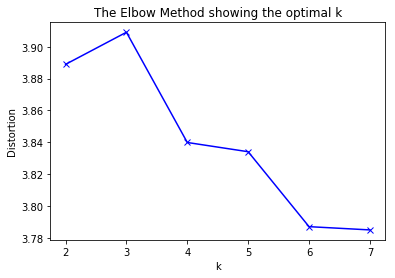

In [62]:
listofwordspercluster = []
#listofwords =[]
clusteritison = []
K=[]
totallist = []
dist = []

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 


for i in range(2,8):
    true_k = i
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(x)
    
    dist.append(sum(np.min(cdist(x, model.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
    

    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()

    for i in range(true_k):
        #print("Cluster :" , i+1)
        listofwords = []
        for ind in order_centroids[i, :-1]:
            listofwords.append(terms[ind])
        #print(listofwords)
        totallist.append(listofwords)
        #print(totallist)
        #listofwordspercluster.append(listofwords)
        clusteritison.append(int(i+1))
        K.append(true_k)
    
DFclusters = pd.DataFrame({'K_askedfor': K, 'clusternumber': clusteritison, 'listofwordspercluster':  totallist})  

plt.plot(range(2,8), dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [40]:
DFclusters.to_csv('clustersandwords_companies.csv', sep=',')

In [45]:
DFofall

,K_askedfor,clusternumber,listofwordspercluster
0,2,1,"[to, we, of, in, our, is, this, so, all, you, ..."
1,2,2,"[in, our, love, summer, dress, to, of, is, on,..."
2,3,1,"[in, our, love, heidiklein, bikini, summer, st..."
3,3,2,"[miguelinamoment, roundtheworldinmiguelina, gl..."
4,3,3,"[in, dress, to, is, of, summer, love, for, thi..."
5,4,1,"[love, heidiklein, style, swimwear, travel, in..."
6,4,2,"[com, matchesfashion, now, available, mytheres..."
7,4,3,"[in, dress, to, is, of, summer, for, this, lov..."
8,4,4,"[in, our, zeusndione, on, lisamariefernandez, ..."
9,5,1,"[ss16, beautiful, by, our, we, pink, pinkgirln..."


### using Karan's method

In [53]:
#Define Cluster Count
cluster_count = 2


#Implement K-Means Algortihm
model_kmeans = KMeans(n_clusters=cluster_count, random_state=9001)

#Fit Model and Predict
model_kmeans.fit(x)
y_pred = model_kmeans.predict(x)
DFall['Prediction'] = model_kmeans.labels_
display(DFall.head())

#df['Prediction'] = model_kmeans.labels_
#display(df.head())

ValueError: Length of values does not match length of index

In [ ]:
DFall['Prediction'] = np.zeros(len(DFall.caption))

In [ ]:

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
 
# clustering dataset
# determine k using elbow method
 
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 
    
 
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
 
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()
 
# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
 
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
 
